In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from datetime import datetime, timedelta
from imblearn.combine import SMOTETomek

In [3]:
# read the dataset using pandas
cm_data=pd.read_csv("Copper_Set.xlsx - Result 1.csv")
cm_data

<ipython-input-3-de365959ddd0>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  cm_data=pd.read_csv("Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
#Data Cleaning
cm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
cm_data.shape

(181673, 14)

In [6]:
# verify the number of unique values in each features
column=cm_data.columns
for i in column:
    print(f"{i}:{cm_data[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [7]:
# convert the data type from object to numeric,datetime
cm_data["item_date_1"]=pd.to_datetime(cm_data["item_date"], format='%Y%m%d',errors="coerce")
cm_data["delivery date_1"]=pd.to_datetime(cm_data["delivery date"], format='%Y%m%d',errors="coerce")
cm_data["quantity tons"]=pd.to_numeric(cm_data["quantity tons"],errors="coerce")

In [8]:
cm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               181671 non-null  object        
 1   item_date        181672 non-null  float64       
 2   quantity tons    181672 non-null  float64       
 3   customer         181672 non-null  float64       
 4   country          181645 non-null  float64       
 5   status           181671 non-null  object        
 6   item type        181673 non-null  object        
 7   application      181649 non-null  float64       
 8   thickness        181672 non-null  float64       
 9   width            181673 non-null  float64       
 10  material_ref     103754 non-null  object        
 11  product_ref      181673 non-null  int64         
 12  delivery date    181672 non-null  float64       
 13  selling_price    181672 non-null  float64       
 14  item_date_1      181

In [9]:
# check any null values in data
cm_data.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [10]:
# Some rubbish values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null

cm_data['material_ref'] = cm_data['material_ref'].apply(lambda x: np.nan if str(x).startswith("00000") else x )


In [11]:
# check null values for all features
cm_data.isnull().sum()

id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery date_1         3
dtype: int64

In [12]:
# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.

cm_data.drop(columns=['id','material_ref'], inplace=True)
cm_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [13]:
# quantity and selling price values are below 0. so we convert to null for below 0 values.

cm_data['quantity tons'] = cm_data['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
cm_data['selling_price'] = cm_data['selling_price'].apply(lambda x: np.nan if x<=0 else x)
cm_data.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
count,1.816720e+05,1.816680e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816650e+05,181670,181670
mean,2.020459e+07,5.875066e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918124e+03,2020-11-26 22:56:58.127374080,2021-01-25 22:44:26.223372032
min,1.995000e+07,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,1.000000e-01,2020-07-02 00:00:00,2019-04-01 00:00:00
25%,2.020093e+07,1.097122e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02,2020-09-29 00:00:00,2020-11-01 00:00:00
50%,2.020113e+07,3.036501e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02,2020-11-30 00:00:00,2021-01-01 00:00:00
75%,2.021020e+07,6.716134e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02,2021-02-03 00:00:00,2021-04-01 00:00:00
max,2.021040e+07,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08,2021-04-01 00:00:00,2022-01-01 00:00:00
std,4.551119e+03,2.349107e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.318020e+05,NaN,NaN


In [14]:
cm_data["status"].value_counts()

status
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [15]:
cm_data["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [16]:
# convert categorical data into numerical data - using map and ordinal encoder methods

cm_data['status'] = cm_data['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

cm_data['item type'] = OrdinalEncoder().fit_transform(cm_data[['item type']])
cm_data['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [17]:
cm_data.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery date_1     3
dtype: int64

In [18]:
cm_data[cm_data["customer"].isnull()]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
104684,20201112.0,205.266351,NaN,39.0,1.0,5.0,10.0,3.5,1270.0,1670798778,20210201.0,650.0,2020-11-12,2021-02-01


In [19]:
# Handling null values using mean and mode

# object datatype using mode
cm_data['status'].fillna(cm_data['status'].mode().iloc[0], inplace=True)

cm_data.dropna(subset=["item_date"],inplace=True)
cm_data.dropna(subset=["delivery date"],inplace=True)
cm_data.dropna(subset=["customer"],inplace=True)
cm_data.dropna(subset=["country"],inplace=True)
#cm_data["delivery date"].fillna(method="bfill",inplace=True)

#numerical datatype using mean
cm_data['quantity tons'].fillna(value=cm_data['quantity tons'].median(), inplace=True)
#cm_data['customer'].fillna(value=cm_data['customer'].mode().iloc[0], inplace=True)
#cm_data['country'].fillna(value=cm_data['country'].mode().iloc[0], inplace=True)
cm_data['application'].fillna(value=cm_data['application'].mean(), inplace=True)
cm_data['thickness'].fillna(value=cm_data['thickness'].median(), inplace=True)
cm_data['selling_price'].fillna(value=cm_data['selling_price'].median(), inplace=True)



In [20]:
cm_data.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        2
delivery date_1    2
dtype: int64

**Skewness Handling - Feature Scaling (Log Transformation)**

In [21]:
# find outliers - box plot & skewed data - hist plot and violin plot
def plot(data,column):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  sns.boxplot(data=data,x=column)
  plt.title(f'Boxplot for {column}')

  plt.subplot(1,3,2)
  sns.histplot(data=data, x=column, kde=True, bins=50)
  plt.title(f'Distribution Plot for {column}')

  plt.subplot(1,3,3)
  sns.violinplot(data=data, x=column)
  plt.title(f'Violin Plot for {column}')
  plt.show()



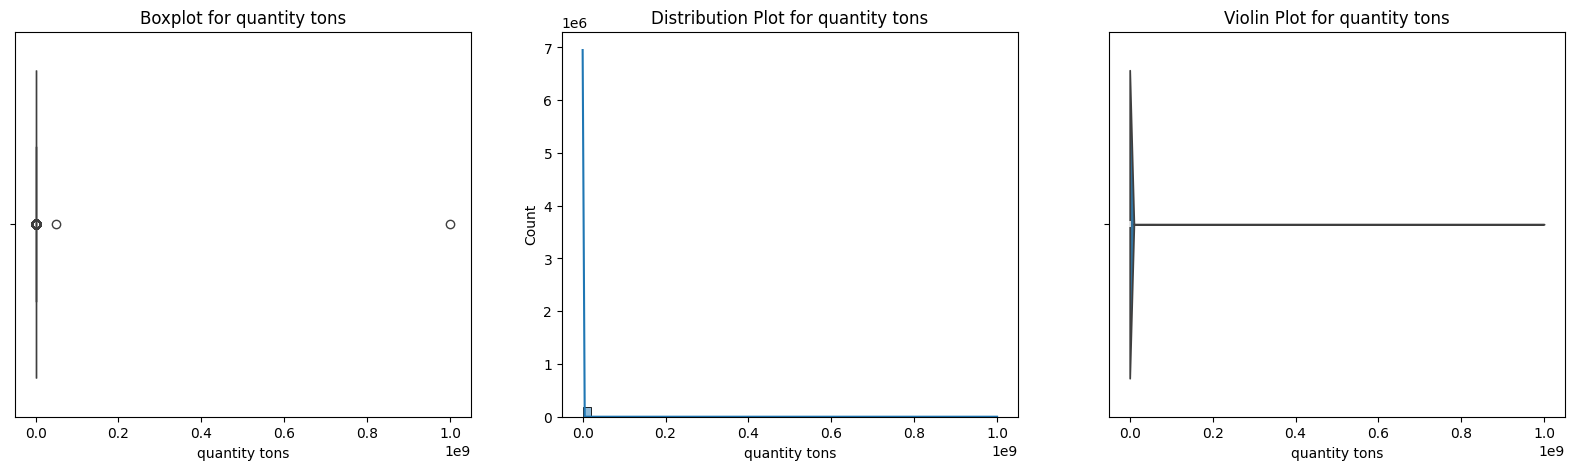

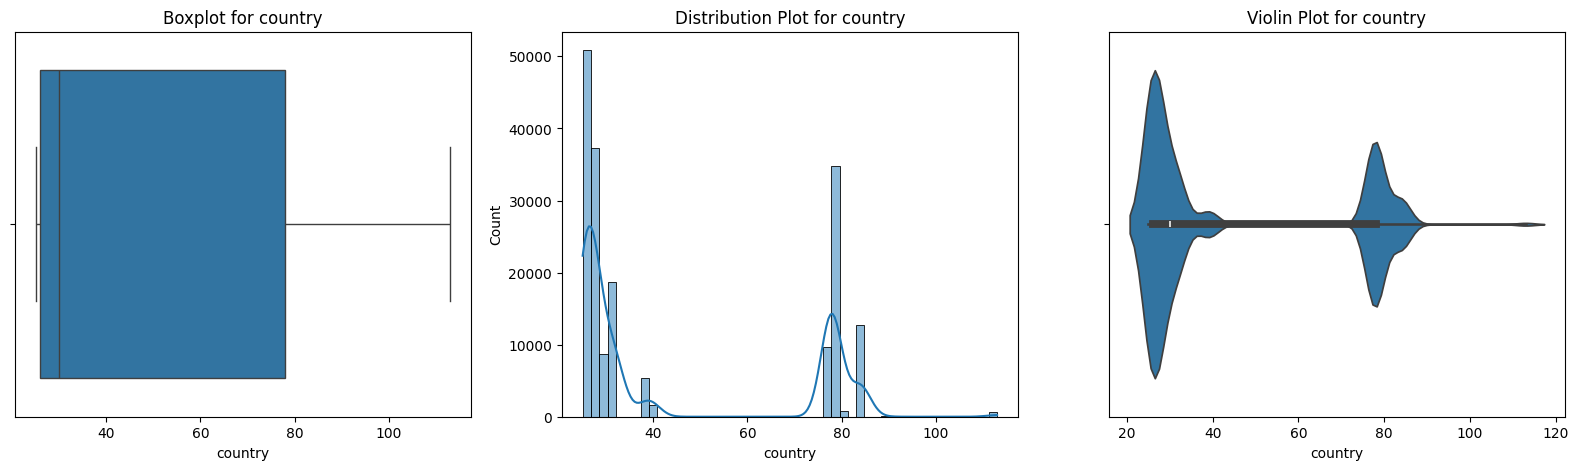

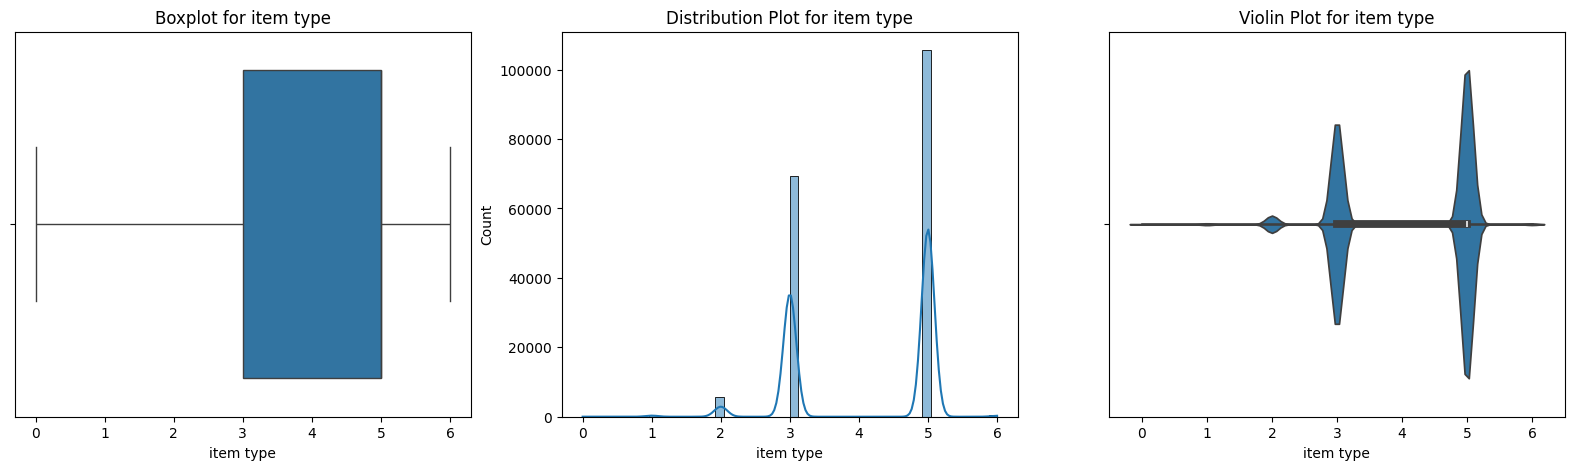

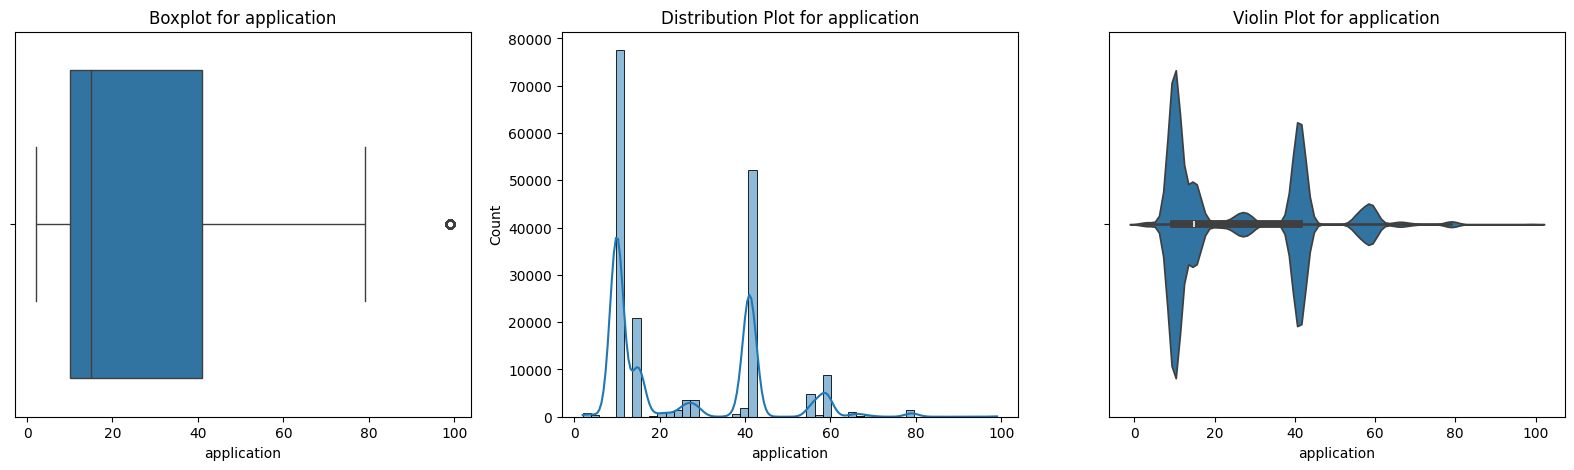

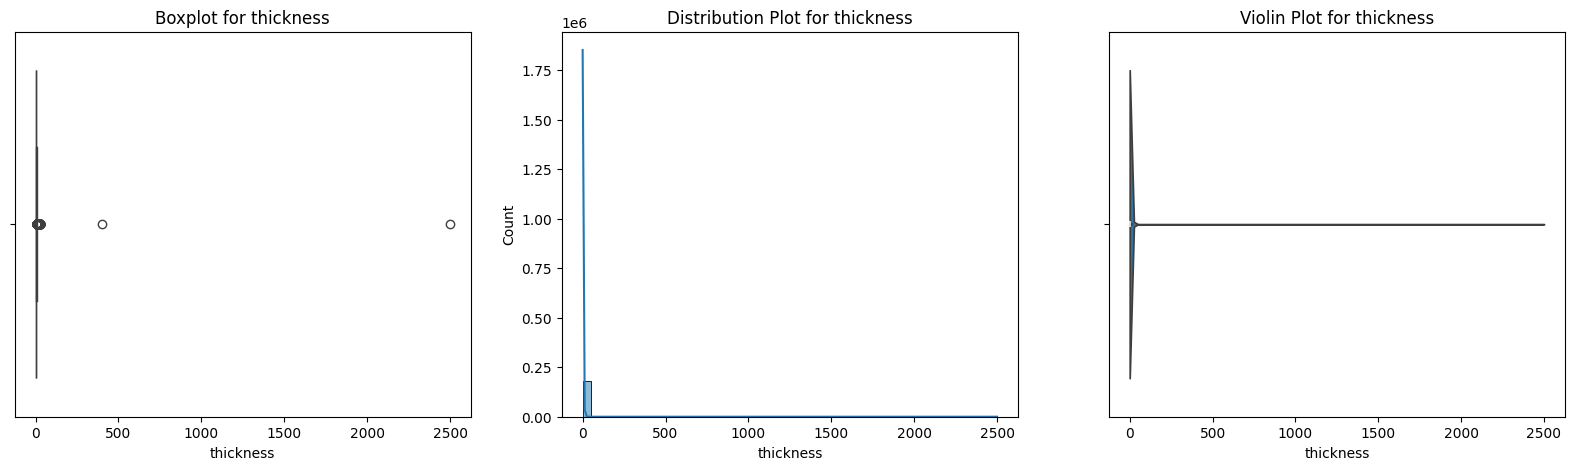

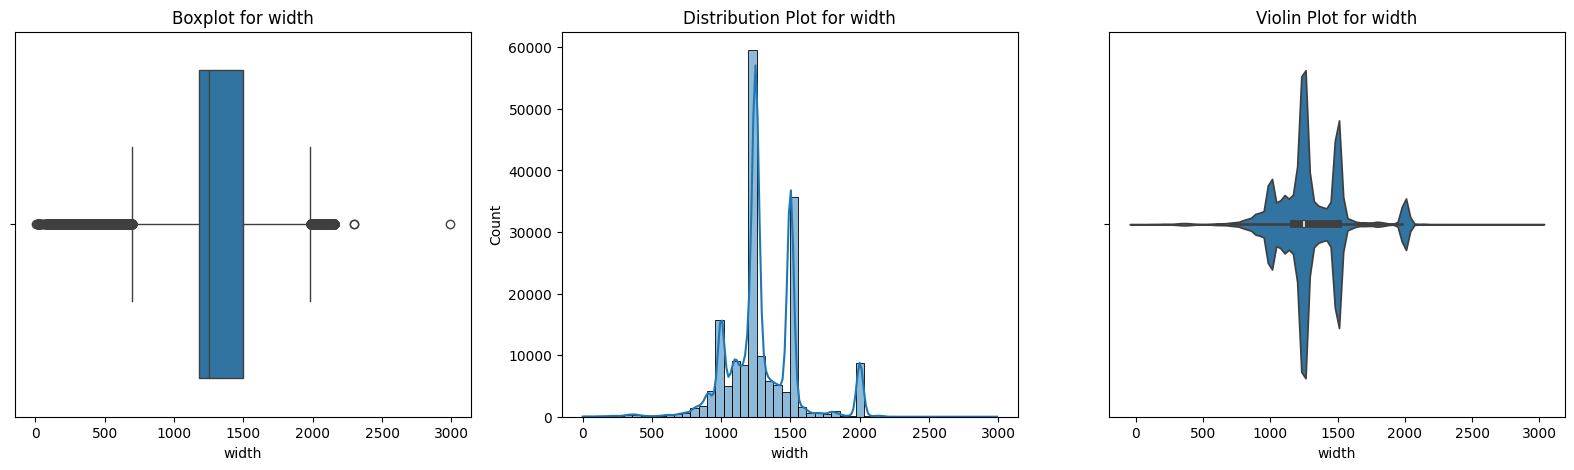

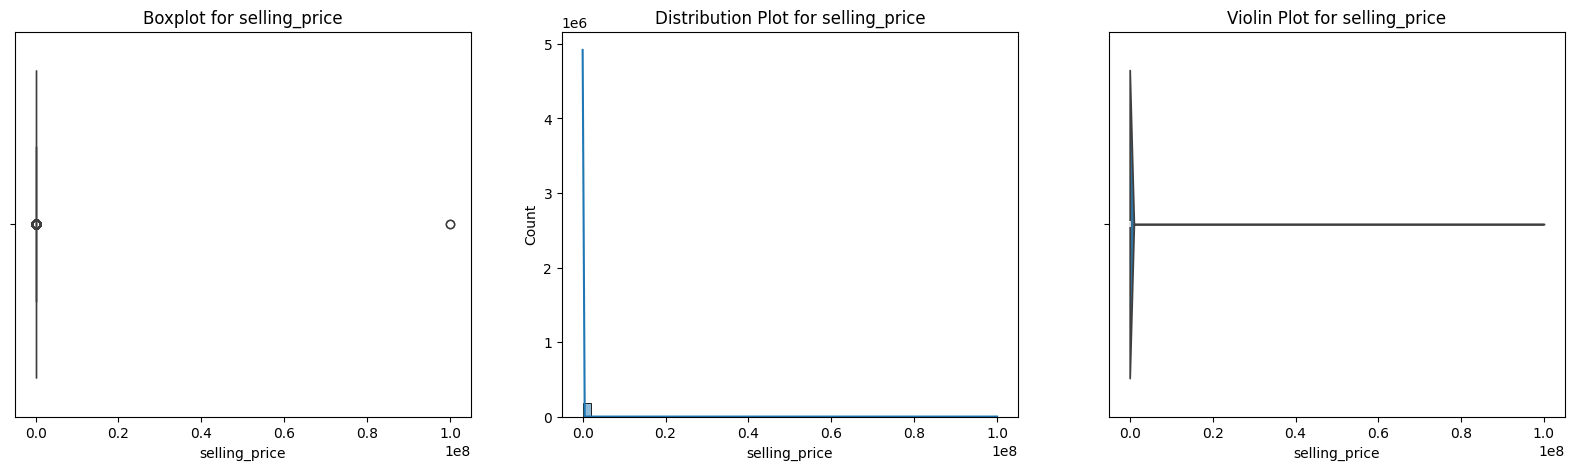

In [22]:
for i in ['quantity tons', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(cm_data, i)

In [23]:
for i in['quantity tons', 'country', 'application', 'thickness', 'width', 'selling_price']:
    skewness=cm_data[i].skew()
    print(f'column:{i}, skew:{skewness}')

column:quantity tons, skew:424.6545809851547
column:country, skew:0.7535985033652393
column:application, skew:0.7243452131503907
column:thickness, skew:303.4792581061295
column:width, skew:0.3748605587505588
column:selling_price, skew:301.36237283396645


In [24]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data
cm_data['quantity_tons_log'] = np.log(cm_data['quantity tons'])
cm_data['thickness_log'] = np.log(cm_data['thickness'])
cm_data['selling_price_log'] = np.log(cm_data['selling_price'])

In [25]:
cm_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1.0,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1.0,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1.0,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1.0,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1.0,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1.0,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1.0,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,5876.050518,30200854.0,25.0,1.0,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,8.678640,-0.162519,6.398595


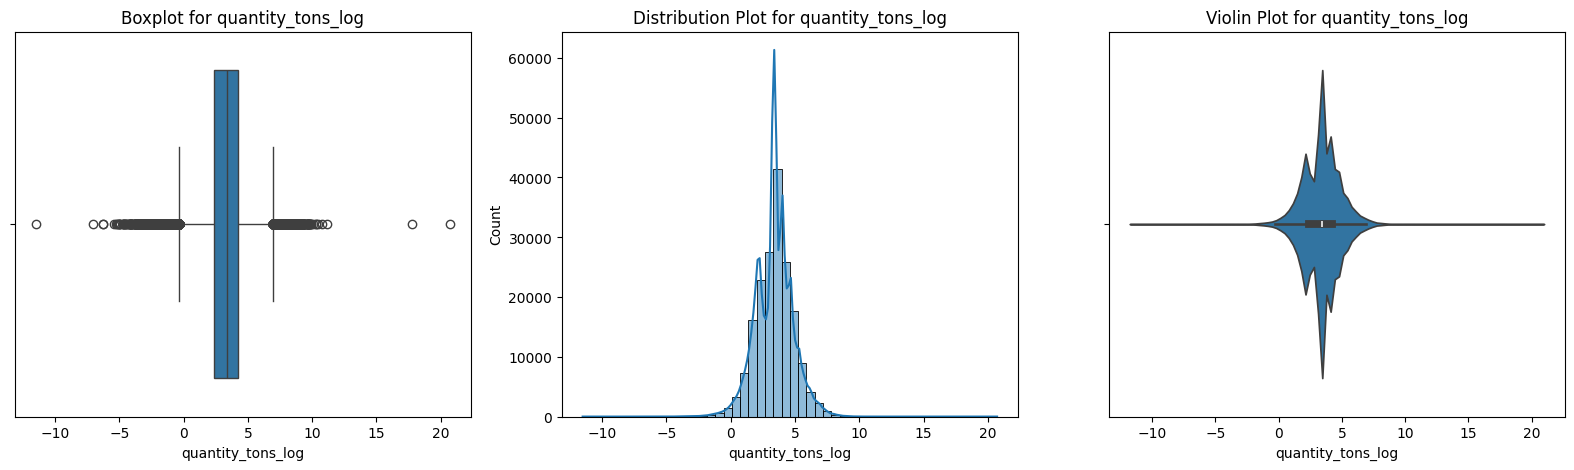

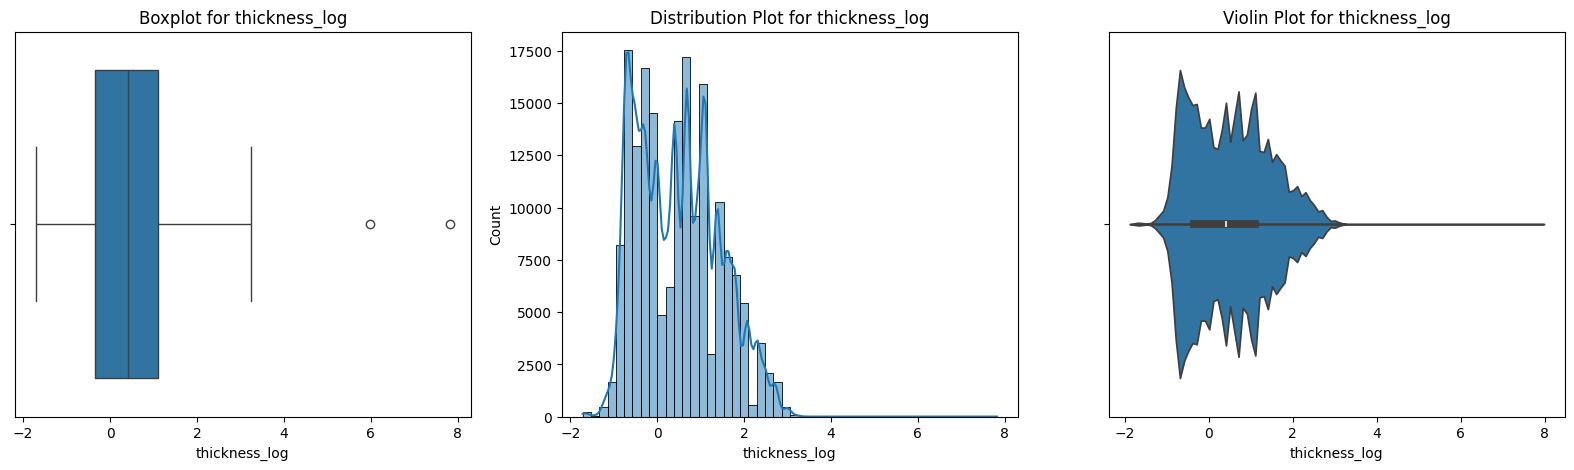

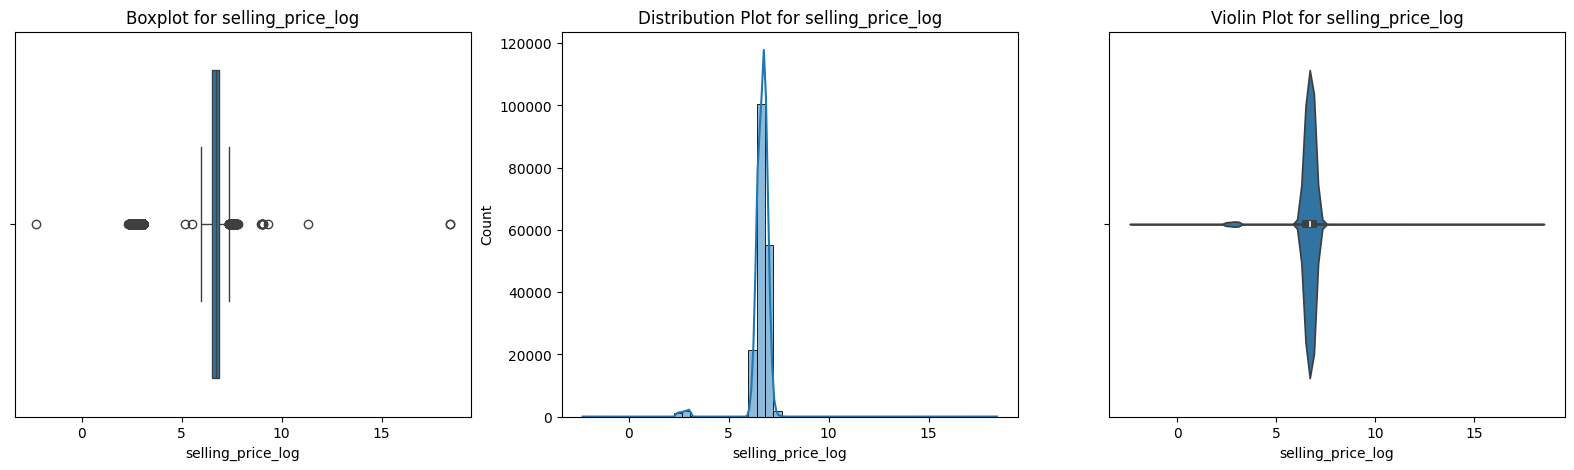

In [26]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity_tons_log', 'thickness_log','selling_price_log']:
    plot(cm_data, i)

In [27]:
cm_data["selling_price"].describe()

count    1.816420e+05
mean     1.918399e+03
std      3.318230e+05
min      1.000000e-01
25%      6.690000e+02
50%      8.120000e+02
75%      9.530000e+02
max      1.000010e+08
Name: selling_price, dtype: float64

In [28]:
cm_data["selling_price_log"].describe()

count    181642.000000
mean          6.626325
std           0.564123
min          -2.302585
25%           6.505784
50%           6.699500
75%           6.859615
max          18.420691
Name: selling_price_log, dtype: float64

In [29]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [30]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features
for i in ['quantity_tons_log', 'thickness_log', 'width','selling_price_log']:
    outlier(cm_data, i)

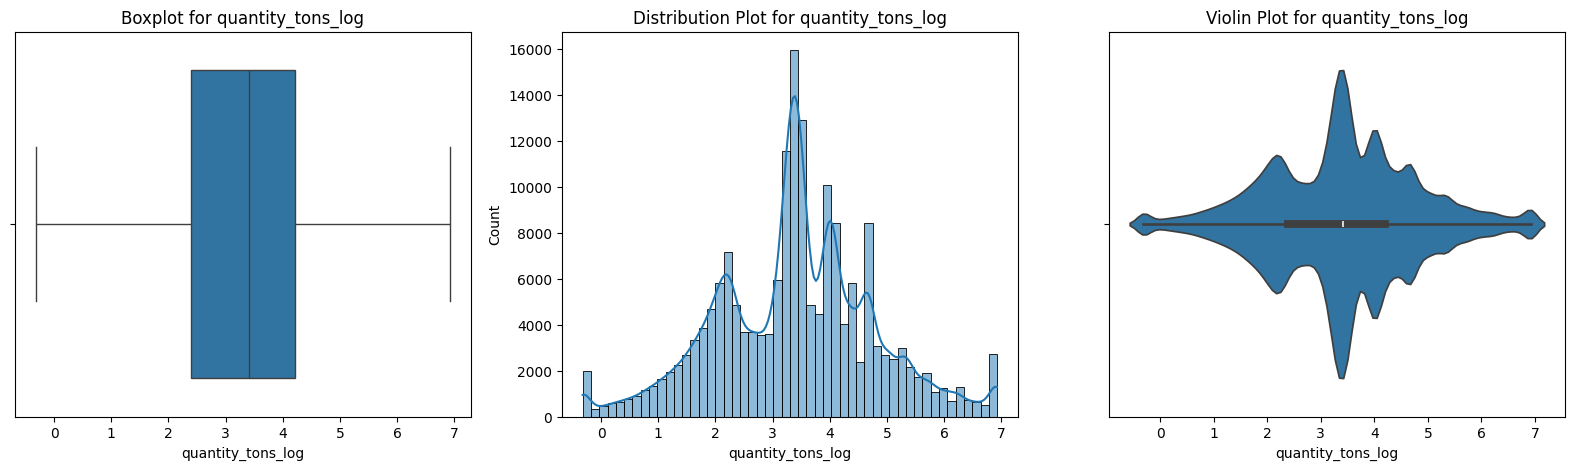

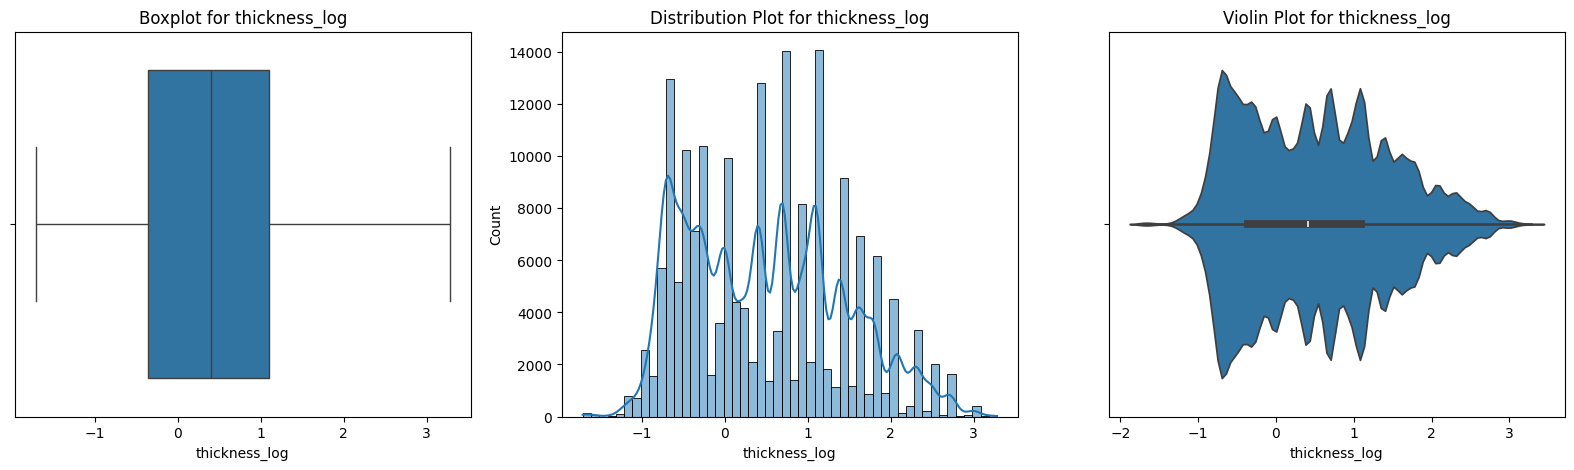

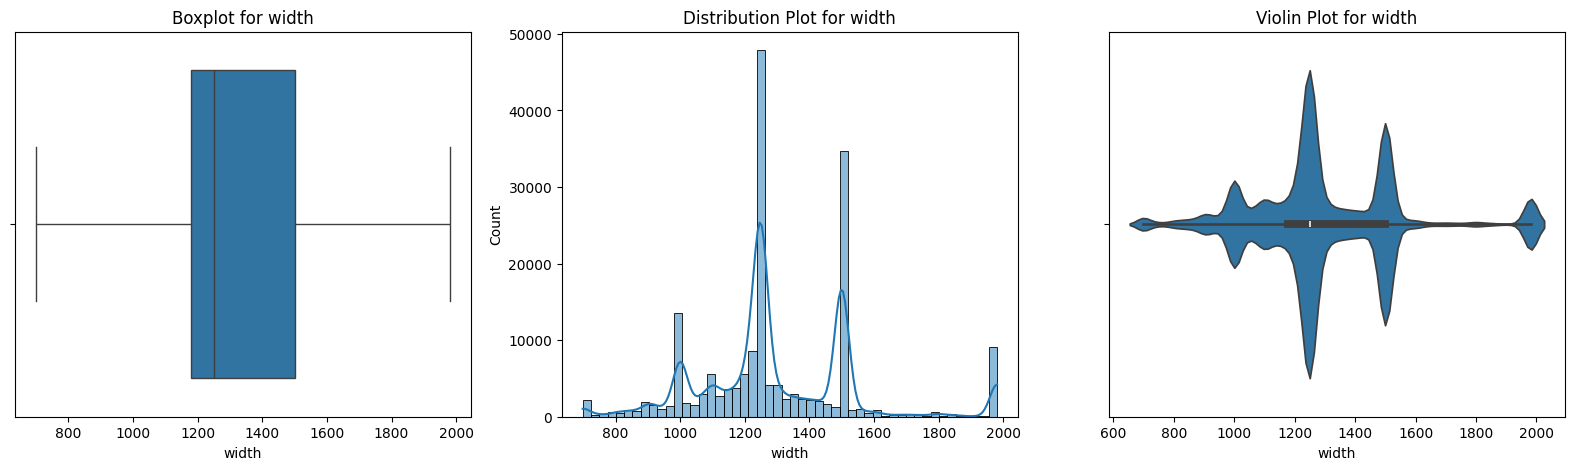

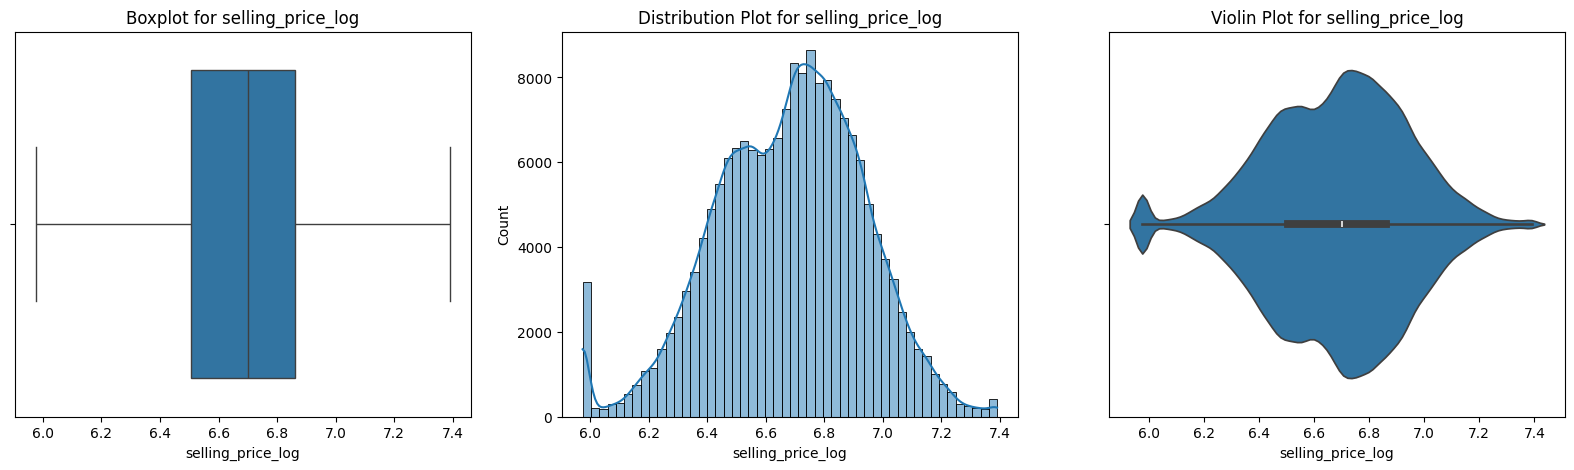

In [31]:
# transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity_tons_log', 'thickness_log', 'width','selling_price_log']:
    plot(cm_data, i)

In [32]:
cm_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.00,1500.000,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1.0,5.0,41.0,0.80,1210.000,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1.0,6.0,28.0,0.38,952.000,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1.0,3.0,59.0,2.30,1317.000,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1.0,5.0,10.0,4.00,1981.125,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842


In [33]:
# after add the new column of 'quantity tons_log', 'thickness_log', drop the existing columns
cm_data.drop(columns=['quantity tons', 'thickness','selling_price'], inplace=True)
cm_data

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1.0,5.0,10.0,1500.000,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1210.000,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1.0,6.0,28.0,952.000,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1.0,3.0,59.0,1317.000,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1.0,5.0,10.0,1981.125,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1220.000,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1500.000,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-07-01,6.925428,-0.162519,6.398595


<Axes: >

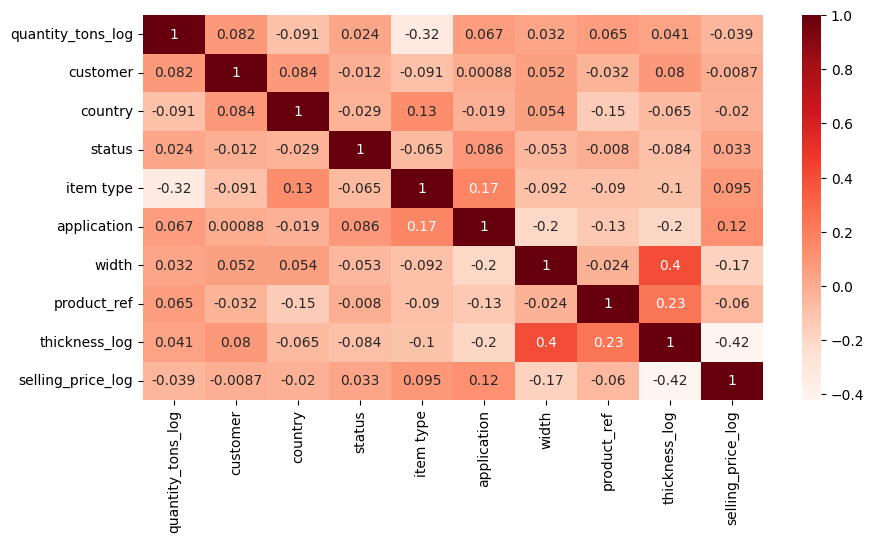

In [34]:
# Need to verify any columns are highly correlated using Heatmap.
col = ['quantity_tons_log','customer','country','status','item type','application','width','product_ref','thickness_log','selling_price_log']
plt.figure(figsize=(10,5))
df_heatmap = cm_data[col].corr()
sns.heatmap(df_heatmap, cmap="Reds",annot=True)


# The highest value is (0.4 or -0.42) only, So there is no columns are highly correlated and no need to drop any columns.
     

**Wrong Delivery Date Handling**

In [35]:
cm_data

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1.0,5.0,10.0,1500.000,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1210.000,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1.0,6.0,28.0,952.000,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1.0,3.0,59.0,1317.000,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1.0,5.0,10.0,1981.125,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1220.000,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1500.000,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-07-01,6.925428,-0.162519,6.398595


In [36]:
# The 'delivery date' is previous date of 'item date'. so this is impossible. delivery date is always greater.
# find the difference between item and delivery date and add the new column of dataframe

cm_data['Date_difference'] = (cm_data['delivery date_1'] - cm_data['item_date_1']).dt.days
cm_data.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference
0,20210401.0,30156308.0,28.0,1.0,5.0,10.0,1500.000,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91.0
1,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1210.000,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0.0
2,20210401.0,30153963.0,30.0,1.0,6.0,28.0,952.000,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90.0
3,20210401.0,30349574.0,32.0,1.0,3.0,59.0,1317.000,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90.0
4,20210401.0,30211560.0,28.0,1.0,5.0,10.0,1981.125,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31.0


In [37]:
cm_data.shape

(181642, 15)

In [38]:

# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
cm_data['item_date_day'] = cm_data['item_date_1'].dt.day
cm_data['item_date_month'] = cm_data['item_date_1'].dt.month
cm_data['item_date_year'] = cm_data['item_date_1'].dt.year
cm_data.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1.0,5.0,10.0,1500.000,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91.0,1.0,4.0,2021.0
1,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1210.000,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0.0,1.0,4.0,2021.0
2,20210401.0,30153963.0,30.0,1.0,6.0,28.0,952.000,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90.0,1.0,4.0,2021.0
3,20210401.0,30349574.0,32.0,1.0,3.0,59.0,1317.000,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90.0,1.0,4.0,2021.0
4,20210401.0,30211560.0,28.0,1.0,5.0,10.0,1981.125,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31.0,1.0,4.0,2021.0


In [39]:
cm_data.shape

(181642, 18)

In [40]:
cm_data[cm_data['Date_difference'].isnull()]

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
52,19950000.0,30162161.0,77.0,1.0,3.0,4.0,1300.0,164141591,20210601.0,NaT,2021-06-01,3.322992,0.095310,6.952729,NaN,NaN,NaN,NaN
58,20210401.0,30271717.0,28.0,3.0,5.0,10.0,1250.0,611993,30310101.0,2021-04-01,NaT,2.612623,-0.510826,7.143618,NaN,1.0,4.0,2021.0
105421,20201112.0,30350566.0,28.0,1.0,3.0,70.0,1250.0,611993,20212222.0,2020-11-12,NaT,3.424719,-0.510826,6.715383,NaN,12.0,11.0,2020.0
105485,20191919.0,30210087.0,26.0,0.0,3.0,42.0,1494.0,1668701718,20210201.0,NaT,2021-02-01,4.622449,1.098612,6.678342,NaN,NaN,NaN,NaN


In [41]:
cm_data.dropna(subset=["Date_difference"],inplace=True)

In [42]:
cm_data.isnull().sum()

item_date            0
customer             0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery date_1      0
quantity_tons_log    0
thickness_log        0
selling_price_log    0
Date_difference      0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [43]:
# split the +ve value of 'Date_difference' column in separate dataframe
cm_pos_datediff = cm_data[cm_data['Date_difference']>=0]
cm_pos_datediff


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1.0,5.0,10.0,1500.000,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91.0,1.0,4.0,2021.0
1,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1210.000,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0.0,1.0,4.0,2021.0
5,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1265.000,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,0.0,1.0,4.0,2021.0
6,20210401.0,30209509.0,30.0,2.0,5.0,41.0,1125.000,611993,20210701.0,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,91.0,1.0,4.0,2021.0
8,20210401.0,30341428.0,38.0,1.0,3.0,10.0,1275.000,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,91.0,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181433,20200702.0,30227718.0,25.0,0.0,3.0,15.0,1981.125,640665,20200801.0,2020-07-02,2020-08-01,3.472467,1.791759,6.313548,30.0,2.0,7.0,2020.0
181525,20200702.0,30161559.0,30.0,0.0,3.0,10.0,1525.000,640665,20200801.0,2020-07-02,2020-08-01,4.196171,1.348073,6.126869,30.0,2.0,7.0,2020.0
181527,20200702.0,30161559.0,30.0,0.0,3.0,10.0,1525.000,640665,20200801.0,2020-07-02,2020-08-01,4.156686,1.766442,6.124683,30.0,2.0,7.0,2020.0
181529,20200702.0,30161559.0,30.0,0.0,3.0,10.0,1500.000,640665,20200801.0,2020-07-02,2020-08-01,4.025862,2.060514,6.126869,30.0,2.0,7.0,2020.0


In [44]:
# after split, the index values are unordered. so need to reset the index to ascending order from 0
cm_pos_datediff = cm_pos_datediff.reset_index(drop=True)
cm_pos_datediff

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1.0,5.0,10.0,1500.000,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91.0,1.0,4.0,2021.0
1,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1210.000,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0.0,1.0,4.0,2021.0
2,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1265.000,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,0.0,1.0,4.0,2021.0
3,20210401.0,30209509.0,30.0,2.0,5.0,41.0,1125.000,611993,20210701.0,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,91.0,1.0,4.0,2021.0
4,20210401.0,30341428.0,38.0,1.0,3.0,10.0,1275.000,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,91.0,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165526,20200702.0,30227718.0,25.0,0.0,3.0,15.0,1981.125,640665,20200801.0,2020-07-02,2020-08-01,3.472467,1.791759,6.313548,30.0,2.0,7.0,2020.0
165527,20200702.0,30161559.0,30.0,0.0,3.0,10.0,1525.000,640665,20200801.0,2020-07-02,2020-08-01,4.196171,1.348073,6.126869,30.0,2.0,7.0,2020.0
165528,20200702.0,30161559.0,30.0,0.0,3.0,10.0,1525.000,640665,20200801.0,2020-07-02,2020-08-01,4.156686,1.766442,6.124683,30.0,2.0,7.0,2020.0
165529,20200702.0,30161559.0,30.0,0.0,3.0,10.0,1500.000,640665,20200801.0,2020-07-02,2020-08-01,4.025862,2.060514,6.126869,30.0,2.0,7.0,2020.0


In [45]:
# split the negative value of 'Date_difference' column in another dataframe
cm_neg_datediff = cm_data[cm_data['Date_difference']<0]
cm_neg_datediff


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
2,20210401.0,30153963.0,30.0,1.0,6.0,28.0,952.000,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90.0,1.0,4.0,2021.0
3,20210401.0,30349574.0,32.0,1.0,3.0,59.0,1317.000,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90.0,1.0,4.0,2021.0
4,20210401.0,30211560.0,28.0,1.0,5.0,10.0,1981.125,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31.0,1.0,4.0,2021.0
7,20210401.0,30342192.0,32.0,1.0,5.0,41.0,1220.000,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,-90.0,1.0,4.0,2021.0
11,20210401.0,30342192.0,32.0,1.0,5.0,41.0,1220.000,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,-90.0,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1220.000,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1.0,2.0,7.0,2020.0
181669,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1500.000,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1.0,2.0,7.0,2020.0
181670,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1.0,2.0,7.0,2020.0
181671,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-07-01,6.925428,-0.162519,6.398595,-1.0,2.0,7.0,2020.0


In [46]:
# after split, the index values are unordered. so need to reset the index to ascending order from 0
cm_neg_datediff = cm_neg_datediff.reset_index(drop=True)
cm_neg_datediff

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1.0,6.0,28.0,952.000,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90.0,1.0,4.0,2021.0
1,20210401.0,30349574.0,32.0,1.0,3.0,59.0,1317.000,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90.0,1.0,4.0,2021.0
2,20210401.0,30211560.0,28.0,1.0,5.0,10.0,1981.125,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31.0,1.0,4.0,2021.0
3,20210401.0,30342192.0,32.0,1.0,5.0,41.0,1220.000,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,-90.0,1.0,4.0,2021.0
4,20210401.0,30342192.0,32.0,1.0,5.0,41.0,1220.000,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,-90.0,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16102,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1220.000,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1.0,2.0,7.0,2020.0
16103,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1500.000,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1.0,2.0,7.0,2020.0
16104,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1.0,2.0,7.0,2020.0
16105,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-07-01,6.925428,-0.162519,6.398595,-1.0,2.0,7.0,2020.0


These 16107 values 'delivery date' are lesser than 'item date'.

First we need to train the ML model using correct 'delivery date' data (cm_pos_datadiff) and predict the 'Date_difference'(cm_neg_datadiff) using ML model.
     

In [47]:
cm_pos_datediff.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity_tons_log', 'thickness_log',
       'selling_price_log', 'Date_difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [48]:
x = cm_pos_datediff.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
y = cm_pos_datediff['Date_difference']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [49]:
x

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1.0,5.0,10.0,1500.000,1670798778,20210701.0,3.991779,0.693147,6.749931,1.0,4.0,2021.0
1,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1210.000,1668701718,20210401.0,6.643822,-0.223144,6.953684,1.0,4.0,2021.0
2,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1265.000,1668701718,20210401.0,5.419608,0.405465,6.890609,1.0,4.0,2021.0
3,20210401.0,30209509.0,30.0,2.0,5.0,41.0,1125.000,611993,20210701.0,1.259203,-0.967584,5.975038,1.0,4.0,2021.0
4,20210401.0,30341428.0,38.0,1.0,3.0,10.0,1275.000,1668701376,20210701.0,4.235147,-0.510826,7.217443,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165526,20200702.0,30227718.0,25.0,0.0,3.0,15.0,1981.125,640665,20200801.0,3.472467,1.791759,6.313548,2.0,7.0,2020.0
165527,20200702.0,30161559.0,30.0,0.0,3.0,10.0,1525.000,640665,20200801.0,4.196171,1.348073,6.126869,2.0,7.0,2020.0
165528,20200702.0,30161559.0,30.0,0.0,3.0,10.0,1525.000,640665,20200801.0,4.156686,1.766442,6.124683,2.0,7.0,2020.0
165529,20200702.0,30161559.0,30.0,0.0,3.0,10.0,1500.000,640665,20200801.0,4.025862,2.060514,6.126869,2.0,7.0,2020.0


In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165531 entries, 0 to 165530
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   item_date          165531 non-null  float64
 1   customer           165531 non-null  float64
 2   country            165531 non-null  float64
 3   status             165531 non-null  float64
 4   item type          165531 non-null  float64
 5   application        165531 non-null  float64
 6   width              165531 non-null  float64
 7   product_ref        165531 non-null  int64  
 8   delivery date      165531 non-null  float64
 9   quantity_tons_log  165531 non-null  float64
 10  thickness_log      165531 non-null  float64
 11  selling_price_log  165531 non-null  float64
 12  item_date_day      165531 non-null  float64
 13  item_date_month    165531 non-null  float64
 14  item_date_year     165531 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 18.9 MB


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [52]:
def machine_learning_delivery_date(algorithm):
    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm':algorithm.__name__,
               'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics


In [53]:
print(machine_learning_delivery_date(DecisionTreeRegressor))
print(machine_learning_delivery_date(ExtraTreesRegressor))
print(machine_learning_delivery_date(RandomForestRegressor))
print(machine_learning_delivery_date(AdaBoostRegressor))
print(machine_learning_delivery_date(GradientBoostingRegressor))
print(machine_learning_delivery_date(XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9998244444901682, 'Mean Absolute Error': 0.004077687498112182, 'Mean Squared Error': 0.27072824478207025, 'Root Mean Squared Error': 0.5203155242562634}
{'Algorithm': 'ExtraTreesRegressor', 'R2': 0.9999889435950797, 'Mean Absolute Error': 0.010476938411816253, 'Mean Squared Error': 0.017050339807291492, 'Root Mean Squared Error': 0.13057694975489162}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9999922664458388, 'Mean Absolute Error': 0.0036644818316368183, 'Mean Squared Error': 0.011926094179478668, 'Root Mean Squared Error': 0.10920665812796704}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.7447016765529186, 'Mean Absolute Error': 16.572161989797497, 'Mean Squared Error': 393.7014968589867, 'Root Mean Squared Error': 19.84191263106928}
{'Algorithm': 'GradientBoostingRegressor', 'R2': 0.9885655882269468, 'Mean Absolute Error': 3.0619859222328474, 'Mean Squared Error': 17.633272988125043, 'Root Mean Squared Error': 4.199199088888862}
{'Algo

In [54]:
x2 = cm_neg_datediff.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)

In [55]:
# Random Forest algorithm is low bias and reduce overfitting compared to others.
# train the model by using Random Forest Regression algorithm to predict 'Date difference'
model = RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x2)


In [56]:
y_pred

array([16.87, 16.81,  0.  , ..., 30.  , 30.  , 30.  ])

In [57]:
# convert float values into integer using list comprehension method
date_difference1 = [int(round(i,0)) for i in y_pred]
print(date_difference1)

[17, 17, 0, 17, 17, 17, 17, 17, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 8, 8, 8, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 7, 9, 1, 1, 1, 1, 7, 7, 7, 7, 10, 10, 1, 10, 13, 10, 10, 10, 13, 13, 13, 13, 13, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 14, 12, 13, 13, 13, 13, 12, 12, 1, 12, 1, 13, 1, 13, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1, 16, 13, 13, 13, 16, 16, 14, 14, 14, 14, 17, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 17, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 20, 20, 20, 20, 20, 20, 16, 20, 20, 20, 20, 20, 21, 21, 21, 21, 2

In [58]:
# add 'Date_difference' column in the dataframe
cm_neg_datediff["Date_difference"]=pd.DataFrame((date_difference1))
cm_neg_datediff

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1.0,6.0,28.0,952.000,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,17,1.0,4.0,2021.0
1,20210401.0,30349574.0,32.0,1.0,3.0,59.0,1317.000,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,17,1.0,4.0,2021.0
2,20210401.0,30211560.0,28.0,1.0,5.0,10.0,1981.125,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,0,1.0,4.0,2021.0
3,20210401.0,30342192.0,32.0,1.0,5.0,41.0,1220.000,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,17,1.0,4.0,2021.0
4,20210401.0,30342192.0,32.0,1.0,5.0,41.0,1220.000,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,17,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16102,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1220.000,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,30,2.0,7.0,2020.0
16103,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1500.000,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,30,2.0,7.0,2020.0
16104,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,30,2.0,7.0,2020.0
16105,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-07-01,6.925428,-0.162519,6.398595,30,2.0,7.0,2020.0


In [59]:
# calculate delivery date (item_date + Date_difference = delivery_date)
def find_delivery_date(item_date,date_difference):
  result_date=item_date + timedelta(days=date_difference)
  delivery_date= result_date.strftime("%Y-%m-%d")
  return delivery_date

In [60]:
cm_neg_datediff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16107 entries, 0 to 16106
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   item_date          16107 non-null  float64       
 1   customer           16107 non-null  float64       
 2   country            16107 non-null  float64       
 3   status             16107 non-null  float64       
 4   item type          16107 non-null  float64       
 5   application        16107 non-null  float64       
 6   width              16107 non-null  float64       
 7   product_ref        16107 non-null  int64         
 8   delivery date      16107 non-null  float64       
 9   item_date_1        16107 non-null  datetime64[ns]
 10  delivery date_1    16107 non-null  datetime64[ns]
 11  quantity_tons_log  16107 non-null  float64       
 12  thickness_log      16107 non-null  float64       
 13  selling_price_log  16107 non-null  float64       
 14  Date_d

In [61]:
# find out the delivery date and add to dataframe
cm_neg_datediff['delivery date_1'] = cm_neg_datediff.apply(lambda x: find_delivery_date(x['item_date_1'], x['Date_difference']), axis=1)
cm_neg_datediff


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1.0,6.0,28.0,952.000,628377,20210101.0,2021-04-01,2021-04-18,5.956169,-0.967584,6.468211,17,1.0,4.0,2021.0
1,20210401.0,30349574.0,32.0,1.0,3.0,59.0,1317.000,1668701718,20210101.0,2021-04-01,2021-04-18,5.310301,0.832909,6.643790,17,1.0,4.0,2021.0
2,20210401.0,30211560.0,28.0,1.0,5.0,10.0,1981.125,640665,20210301.0,2021-04-01,2021-04-01,6.666354,1.386294,6.357842,0,1.0,4.0,2021.0
3,20210401.0,30342192.0,32.0,1.0,5.0,41.0,1220.000,611993,20210101.0,2021-04-01,2021-04-18,4.730808,-0.385662,6.836259,17,1.0,4.0,2021.0
4,20210401.0,30342192.0,32.0,1.0,5.0,41.0,1220.000,611993,20210101.0,2021-04-01,2021-04-18,4.736160,-0.597837,6.860664,17,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16102,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1220.000,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,30,2.0,7.0,2020.0
16103,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1500.000,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,30,2.0,7.0,2020.0
16104,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,30,2.0,7.0,2020.0
16105,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.000,164141591,20200701.0,2020-07-02,2020-08-01,6.925428,-0.162519,6.398595,30,2.0,7.0,2020.0


In [62]:
# Finally concatinate the both dataframe into single dataframe
cm_data_final = pd.concat([cm_pos_datediff,cm_neg_datediff], axis=0, ignore_index=True)
cm_data_final

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1.0,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01 00:00:00,3.991779,0.693147,6.749931,91.0,1.0,4.0,2021.0
1,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,6.643822,-0.223144,6.953684,0.0,1.0,4.0,2021.0
2,20210401.0,30202938.0,25.0,1.0,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,5.419608,0.405465,6.890609,0.0,1.0,4.0,2021.0
3,20210401.0,30209509.0,30.0,2.0,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01 00:00:00,1.259203,-0.967584,5.975038,91.0,1.0,4.0,2021.0
4,20210401.0,30341428.0,38.0,1.0,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01 00:00:00,4.235147,-0.510826,7.217443,91.0,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181633,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,30.0,2.0,7.0,2020.0
181634,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,30.0,2.0,7.0,2020.0
181635,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,30.0,2.0,7.0,2020.0
181636,20200702.0,30200854.0,25.0,1.0,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,6.925428,-0.162519,6.398595,30.0,2.0,7.0,2020.0


In [63]:
cm_data_final.isnull().sum()

item_date            0
customer             0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery date_1      0
quantity_tons_log    0
thickness_log        0
selling_price_log    0
Date_difference      0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [64]:
cm_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181638 entries, 0 to 181637
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   item_date          181638 non-null  float64       
 1   customer           181638 non-null  float64       
 2   country            181638 non-null  float64       
 3   status             181638 non-null  float64       
 4   item type          181638 non-null  float64       
 5   application        181638 non-null  float64       
 6   width              181638 non-null  float64       
 7   product_ref        181638 non-null  int64         
 8   delivery date      181638 non-null  float64       
 9   item_date_1        181638 non-null  datetime64[ns]
 10  delivery date_1    181638 non-null  object        
 11  quantity_tons_log  181638 non-null  float64       
 12  thickness_log      181638 non-null  float64       
 13  selling_price_log  181638 non-null  float64 

In [65]:
# split the day, month, and year from 'delivery_date_1' column and add dataframe (This data also help us to prediction)

cm_data_final['delivery date_1'] = pd.to_datetime(cm_data_final['delivery date_1'])

cm_data_final['delivery_date_day'] = cm_data_final['delivery date_1'].dt.day
cm_data_final['delivery_date_month'] = cm_data_final['delivery date_1'].dt.month
cm_data_final['delivery_date_year'] = cm_data_final['delivery date_1'].dt.year

# finally drop the item_date, delivery_date and date_difference columns
cm_data_final.drop(columns=['item_date','delivery date','item_date_1','delivery date_1','Date_difference'], inplace=True)


# converting data type float to int of item_date_day,item_date_month,item_date_year
cm_data_final["item_date_day"]=cm_data_final["item_date_day"].astype(int)
cm_data_final["item_date_month"]=cm_data_final["item_date_month"].astype(int)
cm_data_final["item_date_year"]=cm_data_final["item_date_year"].astype(int)
cm_data_final["status"]=cm_data_final["status"].astype(int)
cm_data_final

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181633,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181634,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181635,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181636,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,6.925428,-0.162519,6.398595,2,7,2020,1,8,2020


In [66]:
cm_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181638 entries, 0 to 181637
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer             181638 non-null  float64
 1   country              181638 non-null  float64
 2   status               181638 non-null  int64  
 3   item type            181638 non-null  float64
 4   application          181638 non-null  float64
 5   width                181638 non-null  float64
 6   product_ref          181638 non-null  int64  
 7   quantity_tons_log    181638 non-null  float64
 8   thickness_log        181638 non-null  float64
 9   selling_price_log    181638 non-null  float64
 10  item_date_day        181638 non-null  int64  
 11  item_date_month      181638 non-null  int64  
 12  item_date_year       181638 non-null  int64  
 13  delivery_date_day    181638 non-null  int32  
 14  delivery_date_month  181638 non-null  int32  
 15  delivery_date_yea

In [67]:
cm_data_final.to_csv("coppermodelling_ml.csv",index=False)

In [68]:
cm_data_final["status"].value_counts()

status
1    116008
0     34432
4     19569
6      4276
3      4168
2      3121
7        53
8        10
5         1
Name: count, dtype: int64

**Classification Method - Predict Status**

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
cm_data_status= cm_data_final[(cm_data_final.status == 1) | (cm_data_final.status == 0)]
cm_data_status

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
5,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181633,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181634,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181635,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181636,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,6.925428,-0.162519,6.398595,2,7,2020,1,8,2020


In [71]:
# check no of rows (records) of each 1 and 0 in dataframe
cm_data_status['status'].value_counts()

status
1    116008
0     34432
Name: count, dtype: int64

In [72]:
# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversampling to reduce the difference

x = cm_data_status.drop('status', axis=1)
y = cm_data_status['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)

In [73]:
x.shape, y.shape, x_new.shape, y_new.shape

((150440, 15), (150440,), (229484, 15), (229484,))

**Standard Scaling**

In [74]:
#scaled data after oversampling
from sklearn.preprocessing import StandardScaler
x_scaled_data_fit = StandardScaler().fit(x_new)
x_scaled_trans=x_scaled_data_fit.transform(x_new)
scaled_df = pd.DataFrame(x_scaled_trans, columns=x_new.columns)

In [75]:
scaled_df

,customer,country,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,-0.575055,-0.663229,0.922597,-0.779742,0.685480,1.578130,0.402788,0.086719,0.304175,-1.648409,-0.709151,1.365534,-0.164424,0.374933,0.718225
1,-0.238435,-0.788181,0.922597,1.050357,-0.428976,1.575279,2.464234,-0.877821,1.183338,-1.648409,-0.709151,1.365534,-0.164424,-0.514056,0.718225
2,-0.238435,-0.788181,0.922597,1.050357,-0.217614,1.575279,1.512647,-0.216112,0.911179,-1.648409,-0.709151,1.365534,-0.164424,-0.514056,0.718225
3,0.761319,-0.246720,-1.003527,-0.779742,-0.179184,1.575279,0.591959,-1.180652,2.321417,-1.648409,-0.709151,1.365534,-0.164424,0.374933,0.718225
4,-0.238435,-0.788181,0.922597,1.050357,-0.601909,1.575279,2.311021,-0.216112,0.911179,-1.648409,-0.709151,1.365534,-0.164424,-0.514056,0.718225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229479,-0.508489,1.419314,0.922597,-0.779742,0.685480,-0.692521,-0.326785,1.243181,-1.024628,-1.531393,1.352093,-0.732314,-0.164424,-1.403045,0.718225
229480,-0.221297,-0.496626,0.922597,-0.779742,0.685480,1.578130,-0.278468,0.513534,-0.431142,-1.414378,1.352093,-0.732314,-0.164424,-0.514056,0.718225
229481,0.407139,-0.710154,-1.003527,1.184928,-0.275258,-0.692537,-0.120956,-0.848075,0.162542,-1.297362,0.321471,-0.732314,-0.164424,1.560251,-1.391998
229482,-0.250815,-0.746531,0.043735,-0.484565,0.685480,1.579578,-0.302940,0.425963,-0.964915,1.276981,0.321471,-0.732314,-0.164424,1.263921,-1.391998


In [76]:
scaled_df.describe()

,customer,country,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
count,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05,2.294840e+05
mean,2.590365e-14,-8.498660e-16,-5.881041e-16,3.342570e-16,2.479487e-16,9.846115e-18,3.189770e-16,2.941450e-17,3.774305e-16,4.385082e-18,-9.080758e-19,-2.089298e-13,1.521813e-17,1.420643e-16,-8.578047e-14
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.181823e+02,-7.881815e-01,-3.892713e+00,-1.252026e+00,-2.396087e+00,-6.925598e-01,-2.951129e+00,-2.448022e+00,-3.039367e+00,-1.648409e+00,-1.482118e+00,-7.323143e-01,-1.644239e-01,-1.403045e+00,-1.391998e+00
25%,-2.772654e-01,-7.465306e-01,-1.003527e+00,-7.797422e-01,-4.674058e-01,-6.925372e-01,-6.104304e-01,-8.778212e-01,-7.428360e-01,-8.292997e-01,-9.668068e-01,-7.323143e-01,-1.644239e-01,-8.103855e-01,-1.391998e+00
50%,-2.204160e-01,-6.153364e-01,9.225971e-01,-4.845649e-01,-2.752582e-01,-6.925205e-01,-1.307226e-02,3.272440e-02,2.524412e-02,-1.019050e-02,3.214710e-01,-7.323143e-01,-1.644239e-01,-2.177264e-01,7.182246e-01
75%,3.485608e-01,1.377663e+00,9.225971e-01,1.050357e+00,6.854798e-01,1.575279e+00,5.679534e-01,8.163649e-01,7.056968e-01,8.089187e-01,8.367822e-01,1.365534e+00,-1.644239e-01,9.675919e-01,7.182246e-01
max,1.243236e+00,2.877093e+00,1.885659e+00,4.474414e+00,2.534420e+00,1.648023e+00,2.683127e+00,2.811412e+00,3.067530e+00,1.862059e+00,1.352093e+00,1.365534e+00,8.825462e+00,1.856581e+00,2.828447e+00


In [77]:
import pickle

pickle_=open("x_scaled_data_fit","wb")
pickle.dump(x_scaled_data_fit,pickle_)
pickle_.close()

In [78]:
#scaled data before oversampling
x_scaled_before_fit = StandardScaler().fit(x)
x_scaled_before_trans=x_scaled_before_fit.transform(x)
scaled_df_before = pd.DataFrame(x_scaled_before_trans, columns=x.columns)

In [79]:
scaled_df_before

,customer,country,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,-0.725086,-0.710175,0.769802,-0.861401,0.790784,1.667395,0.443623,0.202276,0.264001,-1.613062,-0.693816,1.255874,-0.193699,0.352780,0.697129
1,-0.283552,-0.832683,0.769802,0.895977,-0.354857,1.664471,2.348070,-0.781595,1.117067,-1.613062,-0.693816,1.255874,-0.193699,-0.516188,0.697129
2,-0.283552,-0.832683,0.769802,0.895977,-0.137581,1.664471,1.468955,-0.106624,0.852986,-1.613062,-0.693816,1.255874,-0.193699,-0.516188,0.697129
3,1.027791,-0.301813,-1.136519,-0.861401,-0.098076,1.664471,0.618387,-1.090495,2.221365,-1.613062,-0.693816,1.255874,-0.193699,0.352780,0.697129
4,-0.283552,-0.832683,0.769802,0.895977,-0.532629,1.664471,2.206526,-0.106624,0.852986,-1.613062,-0.693816,1.255874,-0.193699,-0.516188,0.697129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150435,-0.303285,-0.832683,0.769802,0.895977,-0.315352,-0.433174,0.901711,-0.585826,-1.277211,-1.498648,0.061193,-0.796258,-0.193699,0.642436,-1.433935
150436,-0.303285,-0.832683,0.769802,0.895977,0.790784,-0.433174,1.410319,-0.597070,-1.291403,-1.498648,0.061193,-0.796258,-0.193699,0.642436,-1.433935
150437,-0.303285,-0.832683,0.769802,0.895977,-0.196838,-0.433174,-1.386294,-0.909744,-1.083409,-1.498648,0.061193,-0.796258,-0.193699,0.642436,-1.433935
150438,-0.303285,-0.832683,0.769802,0.895977,-0.196838,-0.433174,2.550293,-0.716499,-1.206961,-1.498648,0.061193,-0.796258,-0.193699,0.642436,-1.433935


In [80]:
# check the accuracy of training and testing using metrics

def machine_learning_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train =accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [81]:
print("after oversampling data")
print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))
print(machine_learning_classification(x_new, y_new, XGBClassifier))

after oversampling data
{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9646382116478202}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9856853389110399}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9843127001764821}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7703650040580216, 'accuracy_test': 0.7697235113406105}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8139792033204966, 'accuracy_test': 0.8124496154432752}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9548606382804883, 'accuracy_test': 0.948231910582391}


In [82]:
#before oversampling
print("before oversampling data")
print(machine_learning_classification(x, y, DecisionTreeClassifier))
print(machine_learning_classification(x, y, ExtraTreesClassifier))
print(machine_learning_classification(x, y, RandomForestClassifier))
print(machine_learning_classification(x, y, AdaBoostClassifier))
print(machine_learning_classification(x, y, GradientBoostingClassifier))
print(machine_learning_classification(x, y, XGBClassifier))

before oversampling data
{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.951741558096251}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9739098643977665}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9699880350970487}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.8161060888061685, 'accuracy_test': 0.8130816272268013}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8379752725339006, 'accuracy_test': 0.8358814145174156}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.946947287955331, 'accuracy_test': 0.9347580430736506}


In [83]:
#after scaling, before oversampling
print("after scaling before oversampling")
print(machine_learning_classification(scaled_df_before, y, DecisionTreeClassifier))
print(machine_learning_classification(scaled_df_before, y, ExtraTreesClassifier))
print(machine_learning_classification(scaled_df_before, y, RandomForestClassifier))
print(machine_learning_classification(scaled_df_before, y, AdaBoostClassifier))
print(machine_learning_classification(scaled_df_before, y, GradientBoostingClassifier))
print(machine_learning_classification(scaled_df_before, y, XGBClassifier))

after scaling before oversampling
{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9524727466099442}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9743751661792076}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9701542143047062}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.8162307232119117, 'accuracy_test': 0.8129819197022069}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8375265886732252, 'accuracy_test': 0.8352499335283169}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.945526455729859, 'accuracy_test': 0.931899760701941}


In [84]:
#after scaling ,oversampling
print("after scaling oversampling data")
print(machine_learning_classification(scaled_df, y_new, DecisionTreeClassifier))
print(machine_learning_classification(scaled_df, y_new, ExtraTreesClassifier))
print(machine_learning_classification(scaled_df, y_new, RandomForestClassifier))
print(machine_learning_classification(scaled_df, y_new, AdaBoostClassifier))
print(machine_learning_classification(scaled_df, y_new, GradientBoostingClassifier))
print(machine_learning_classification(scaled_df, y_new, XGBClassifier))

after scaling oversampling data
{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9647471512299279}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9860993093230495}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.9999945529912249, 'accuracy_test': 0.9837897901823649}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7703650040580216, 'accuracy_test': 0.7697235113406105}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8139846503292717, 'accuracy_test': 0.8124496154432752}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9537603425079118, 'accuracy_test': 0.9472296664269996}


In [85]:
# we got good accuracy after scaling oversampling data
# XGBClassifier is good interpretability, so i select the algorithm

In [86]:
# GridsearchCV is a cross validation function.
# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.
# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.
# example: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
# note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.

In [87]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df,y_new,test_size=0.2,random_state=42)
param_grid = {
     'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)# n_jobs = -1 means it uses the all processors in this process
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [88]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}

In [89]:
grid_search.best_score_

0.9731843680514528

In [90]:
# passing the parameters in the XGB algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(scaled_df,y_new,test_size=0.2,random_state=42)

model = XGBClassifier(learning_rate=0.2,max_depth=7,n_estimators=300).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train =accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9861645977111669, 0.9755321698585965)

- The training accuracy is higher than the test accuracy, which is expected. It indicates that the model is able to effectively learn from the training data and generalize well to unseen data.
- The relatively small difference between the training and test accuracies suggests that the model is not overfitting excessively.
- Overall, the model appears to perform well on both the training and test datasets, indicating that it has learned meaningful patterns from the data and can make accurate predictions on new, unseen data.

In [91]:
# predict the status and check the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(scaled_df,y_new,test_size=0.2,random_state=42)

model_class=  XGBClassifier(learning_rate=0.2,max_depth=7,n_estimators=300).fit(x_train, y_train)
y_pred = model_class.predict(x_test)
print(f'accuracy:{accuracy_score(y_test,y_pred)}')

accuracy:0.9755321698585965


In [92]:
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[22697,   355],
       [  768, 22077]])

In [93]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     23052
           1       0.98      0.97      0.98     22845

    accuracy                           0.98     45897
   macro avg       0.98      0.98      0.98     45897
weighted avg       0.98      0.98      0.98     45897



In [94]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)


0.9754910876081472


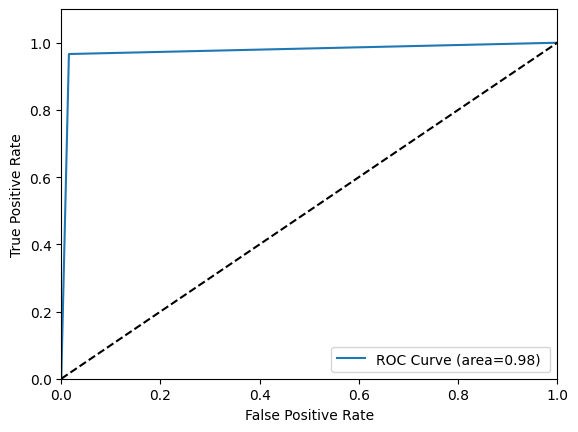

In [95]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [96]:
import sklearn
print(sklearn.__version__)

1.2.2


In [97]:
# Note:
# google colab sklearn version is 1.2.2
# so if you save your model in pickle in colab and download to your system.
# after you load the model in your system for prediction measns ----> your system have same 1.2.2 version of sklearn
# otherwise it cannot load in your system and it shows error

In [98]:
# save the classification model by using pickle
pickle.dump(model_class, open('model_XGB_class.pkl', 'wb'))
pickle_.close()

In [99]:
# Now successfully saved our model in 'classification_model.pkl' pickle file.
# Hereafter you can load and using this pickle file only to predict the status. (don't need any packages - only need numpy for pass user input)


**Regression Method - Perdict Selling Price**

In [100]:
cm_data_final

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181633,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181634,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181635,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181636,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,6.925428,-0.162519,6.398595,2,7,2020,1,8,2020


In [101]:
x_reg = cm_data_final.drop(columns=['selling_price_log'], axis=1)
y_reg = cm_data_final['selling_price_log']

In [ ]:
x_reg

In [102]:
x_scaled_data_fit_regress = StandardScaler().fit(x_reg)
x_scaled_trans_reg=x_scaled_data_fit_regress.transform(x_reg)
scaled_df_reg = pd.DataFrame(x_scaled_trans_reg, columns=x_reg.columns)

In [103]:
pickle_reg=open("x_scaled_data_fit_reg","wb")
pickle.dump(x_scaled_data_fit_regress,pickle_reg)
pickle_reg.close()

In [104]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(x,y, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics


In [105]:
print("After scaled")
print(machine_learning_regression(scaled_df_reg,y_reg, DecisionTreeRegressor))
print(machine_learning_regression(scaled_df_reg,y_reg, ExtraTreesRegressor))
print(machine_learning_regression(scaled_df_reg,y_reg, RandomForestRegressor))
print(machine_learning_regression(scaled_df_reg,y_reg, AdaBoostRegressor))
print(machine_learning_regression(scaled_df_reg,y_reg, GradientBoostingRegressor))
print(machine_learning_regression(scaled_df_reg,y_reg, XGBRegressor))

After scaled
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999186512353863, 'R2_test': 0.9239161416440964}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999186512353863, 'R2_test': 0.9546085230567408}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9939624585665727, 'R2_test': 0.9570075462973308}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6526651796088039, 'R2_test': 0.6507118703002203}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8886406229647621, 'R2_test': 0.8869994986503934}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9518961910801806, 'R2_test': 0.9464443770000075}


In [106]:
# we got good R2 after scaling oversampling data
# XGBClassifier is good interpretability, so i select the algorithm
# already i explained about GridsearchCV in regression method

In [107]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df_reg,y_reg,test_size=0.2,random_state=42)

param_grid_r = { 'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]}


grid_search_r = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [108]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}

In [109]:
grid_search.best_score_

0.9731843680514528

In [110]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x_train, x_test, y_train, y_test = train_test_split(scaled_df_reg,y_reg,test_size=0.2,random_state=42)

model = XGBRegressor(learning_rate=0.2,max_depth=7,n_estimators=300).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test


(0.9716699371305821, 0.9610708896610061)

In [111]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(scaled_df_reg,y_reg,random_state=42)

model_reg =  XGBRegressor(learning_rate=0.2,max_depth=7,n_estimators=300).fit(x_train, y_train)
y_pred = model_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9601365914185728,
 'Mean Absolute Error': 0.03426052679737824,
 'Mean Squared Error': 0.00260177400117317,
 'Root Mean Squared Error': 0.05100758768235536}

In [112]:
# save the classification model by using pickle
pickle.dump(model_reg, open('model_XGB_regression.pkl', 'wb'))
pickle_.close()

In [113]:
# Now successfully saved our model in 'regression_model.pkl' pickle file.
# Hereafter you can load and using this pickle file only to predict the selling price. (don't need any packages - only need numpy for pass user input)


In [114]:
# load pickle model to predict the status (like Trained brain).
#classification scaling data
pickel_in=open("/content/x_scaled_data_fit","rb")
model_data_class=pickle.load(pickel_in)
user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
user_data_scaled=model_data_class.transform(user_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [115]:
user_data_scaled

array([[-0.09069853,  1.41931361,  0.92259711, -0.77974222,  0.68547977,
         1.57527921, -0.98997008, -0.6429276 ,  1.94411237, -1.64840895,
        -0.70915127,  1.36553384, -0.16442388,  0.37493275,  0.71822455]])

In [116]:
#classification prediction
pickel_in_class_pred=open("/content/model_XGB_class.pkl","rb")
class_model=pickle.load(pickel_in_class_pred)
y_p = class_model.predict(user_data_scaled)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


In [117]:
#regressor scaling data
pickel_in_reg=open("/content/x_scaled_data_fit_reg","rb")
model_data_reg=pickle.load(pickel_in_reg)
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
user_data_scaled_reg=model_data_reg.transform(user_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [118]:
#regressor prediction
pickel_in_reg_pred=open("/content/model_XGB_regression.pkl","rb")
reg_model=pickle.load(pickel_in_reg_pred)
y_p = reg_model.predict(user_data_scaled_reg)
np.exp(y_pred[0])


1011.99426

In [121]:
np.median([1,2,3,4,5])

3.0